In [78]:
import json
import glob

def load_data():
    all_data = {}
    bad = 0
    ttl = 0
    for each_file in glob.glob("./data_users/*.txt"):
        if "crawled_" in each_file:
            continue
        user_name = each_file.split("/")[-1].split(".")[0]
        each_data = []
        for line in open(each_file):
            ttl += 1
            try:
                tmp = json.loads(line.strip())
            except:
                bad += 1
                continue
                
            if "publish_time" not in tmp or "img_src" not in tmp:
                bad += 1
                continue
                
            each_data.append(tmp)
            
        all_data[user_name] = each_data
        
    print("total number of bad is: %d\n number of total is: %d" %(bad, ttl))
        
    return all_data

all_data = load_data()

total number of bad is: 214714
 number of total is: 513146


In [79]:
multi_cnt = 0
ttl = 0
real_ttl = 0
for user_name, posts in all_data.items():
    ttl += len(posts)
    for each in posts:
        if "multi_imgs" in each:
            multi_cnt += 1
            real_ttl += len(each["multi_imgs"])
        else:
            real_ttl += 1
print(ttl, multi_cnt, real_ttl)

(290072, 28363, 326142)


In [80]:
for user_name, posts in all_data.items():
    print(posts[0].keys())
    print(posts[0]["publish_time"])
    break

[u'person_result', u'username', u'result', u'publish_time', u'location_name', u'num_of_person', u'src_site', u'face_result', u'detail_link', u'comments', u'height', u'width', u'post_type', u'likes', u'num_of_face', u'detail_link_md5', u'alt', u'location_url', u'img_src']
2019-06-09 18:39:41


In [91]:
print(len(all_data))

posts_cnt = {}
zeros = 0
for user_name, posts in all_data.items():
    num_posts = len(posts)
    if num_posts == 0:
        zeros += 1
        continue
    if num_posts not in posts_cnt:
        posts_cnt[num_posts] = 1
    else:
        posts_cnt[num_posts] += 1
        
print(zeros)

gt_thresh = 0
thresh = 20
for posts_cnt, num in posts_cnt.items():
    if posts_cnt >= 30:
        gt_thresh += num
        
print(gt_thresh)

8526
3840
3477


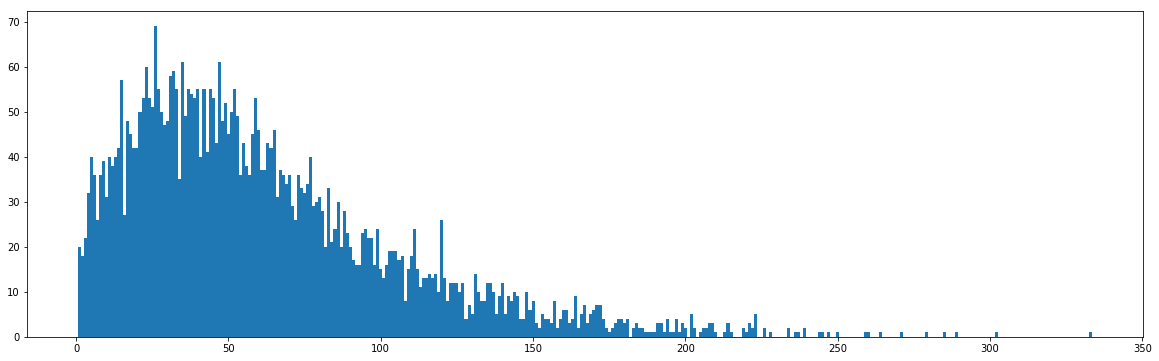

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.bar(posts_cnt.keys(), posts_cnt.values(), width=1)
plt.show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

time_cnt = {}
new_data = {}
for user_name, posts in all_data.items():
    if len(posts) == 0:
        continue
    new_data[user_name] = []
    for each in posts:
        if each["publish_time"] == "":
            continue
        date = "-".join(each["publish_time"].strip().split(" ")[0].split("-")[0:2])
        try:
            time = datetime.strptime(date, '%Y-%m')
        except:
            print(time)
            continue
            
        new_data[user_name].append(each)
            
        if date not in time_cnt:
            time_cnt[date] = 1
        else:
            time_cnt[date] += 1
            
new_time_cnt = {}
for time, cnt in time_cnt.items():
    try:
        time = datetime.strptime(time, '%Y-%m')
    except:
        print(time)
        continue
    new_time_cnt[time] = cnt
    
json.dump(new_data, open("./data_users/all_data.json", "w"))

2018-04-01 00:00:00


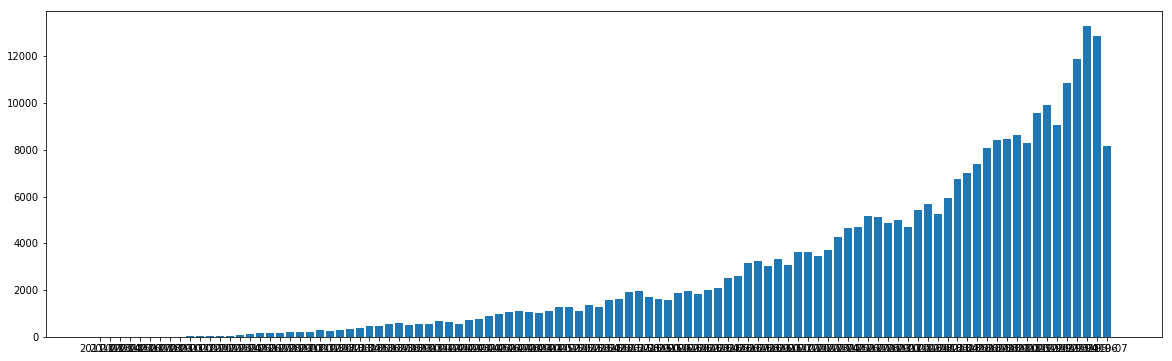

In [84]:
time_series = []
cnt_series = []
for time, cnt in sorted(new_time_cnt.items(), key=lambda i: i[0]):
    time_series.append(time.strftime("%Y-%m"))
    cnt_series.append(cnt)
    #print(time.strftime("%Y-%m"), cnt)
    
x = np.arange(len(cnt_series))
plt.figure(figsize=(20,6))
plt.bar(x, height = cnt_series)
plt.xticks(x, time_series)
plt.show()

In [87]:
print(sum(cnt_series))

289982


In [88]:
# stat hashtags
import re

hashtag_cnt = {}
no_alt_cnt = 0
for user_name, posts in all_data.items():
    for each in posts:
        if "alt" not in each:
            no_alt_cnt += 1
            continue
        s = each["alt"]
        hashtags = re.findall(r"#(\w+)", s)
        
        for hashtag in hashtags:
            if hashtag not in hashtag_cnt:
                hashtag_cnt[hashtag] = 1
            else:
                hashtag_cnt[hashtag] += 1

In [86]:
ttl_hashtags = 0
num = 0
for hashtag, cnt in sorted(hashtag_cnt.items(), key=lambda i: i[1], reverse=True):
    ttl_hashtags += cnt
    num += 1
    if num <= 500:
        print(cnt, hashtag)

(9028, u'love')
(7585, u'fashion')
(6876, u'instagood')
(6831, u'photography')
(5782, u'model')
(5558, u'photooftheday')
(4502, u'picoftheday')
(4105, u'happy')
(3796, u'travel')
(3752, u'style')
(3367, u'friends')
(3288, u'portrait')
(3210, u'photo')
(3140, u'ootd')
(3027, u'smile')
(2962, u'photographer')
(2835, u'girl')
(2803, u'beautiful')
(2712, u'fitness')
(2692, u'tbt')
(2667, u'follow')
(2627, u'paris')
(2580, u'selfie')
(2569, u'summer')
(2558, u'instagram')
(2555, u'life')
(2544, u'followme')
(2469, u'me')
(2416, u'photoshoot')
(2411, u'beauty')
(2401, u'instadaily')
(2327, u'fun')
(2269, u'instalike')
(2254, u'music')
(2211, u'london')
(2154, u'lifestyle')
(2142, u'like4like')
(2069, u'family')
(2003, u'cute')
(1848, u'makeup')
(1739, u'nyc')
(1731, u'like')
(1664, u'portraitphotography')
(1586, u'art')
(1513, u'nature')
(1508, u'fashionblogger')
(1440, u'losangeles')
(1439, u'likeforlike')
(1439, u'likeforlikes')
(1399, u'streetstyle')
(1397, u'igers')
(1372, u'streetphotog